In [1]:
import scipy.io as sio
import librosa
import matplotlib.pyplot as plt
import numpy as np
import scipy
import librosa.display


In [63]:
def load_anomaly_pred(pth):
    return sio.loadmat(pth)['saliency']


def load_audio(pth):
    return librosa.load(pth, mono=True, sr=None)


def crop_audio(aud, sr):
    dur_aud = aud.shape[0]//sr
    return audio[:dur_aud*sr].reshape(dur_aud, sr)


def normalize(s):
    return (s - s.min()) / (s.max() - s.min())

def plot_anomaly(anomaly, normalize_=True, label=""):       
    anomaly = anomaly.mean(axis=1)
    if normalize_:
        anomaly = normalize(anomaly)
    t = anomaly.shape[0]
    plt.plot(range(t), anomaly, label=label)
    plt.legend()
    plt.grid()
    plt.show()
    return


def display_aud(aud, label=""):
    plt.figure()
    librosa.display.waveplot(aud, sr=sr, alpha=0.5, label=label)
    plt.legend()
    plt.show()
    return

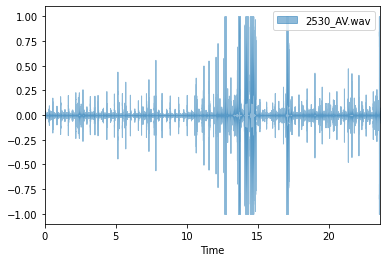

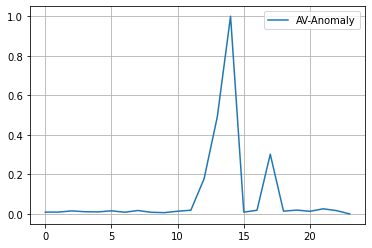

==========================================0


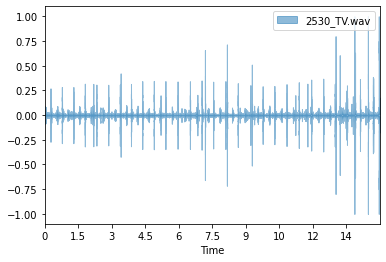

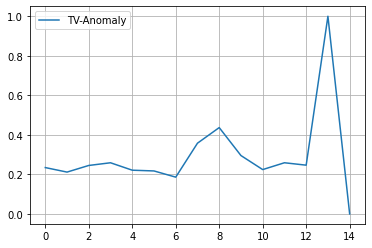

==========================================0


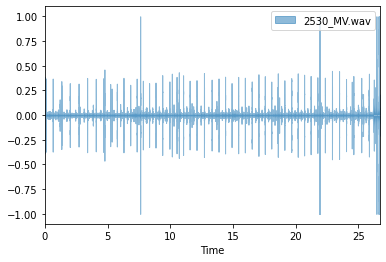

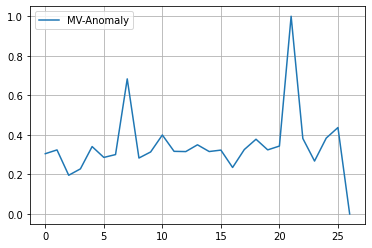

==========================================0


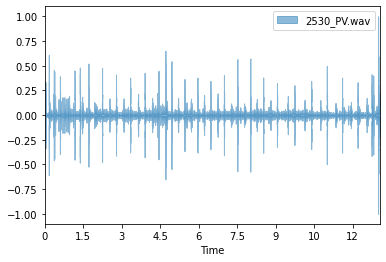

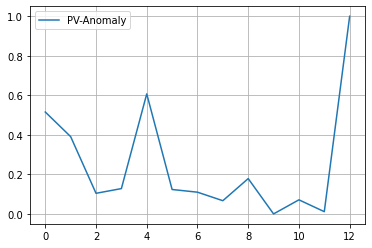

==========================================0


In [64]:
subject_id = 2530

for record_type in ['AV', 'TV', 'MV', 'PV']:
    path_root = f"/home/mertcokelek/Desktop/PCG-Data/{subject_id}_{record_type}"
    audio, sr = load_audio(f"{path_root}.wav")
    anomaly = load_anomaly_pred(f"{path_root}_saliency.mat")
    audio_windowed = crop_audio(audio, sr)
    
    display_aud(audio, f"{subject_id}_{record_type}.wav")
    plot_anomaly(anomaly, label=f'{record_type}-Anomaly')
    print("==========================================0")